In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

refFileName = "./data/m8_1.jpg"
img1 = cv2.imread(refFileName, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# image to be aligned
imgFileName = "./data/m8_2.jpg"
img2 = cv2.imread(imgFileName, cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'target image')

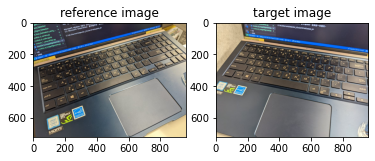

In [52]:
plt.figure()
plt.subplot(121); plt.imshow(img1); plt.title("reference image")
plt.subplot(122); plt.imshow(img2); plt.title("target image")

# Find keypoints and descriptors

In [78]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEARTURES = 1000
orb = cv2.ORB_create(MAX_NUM_FEARTURES)
keypoint1, descrpitors1 = orb.detectAndCompute(img1_gray, None)
keypoint2, descrpitors2 = orb.detectAndCompute(img2_gray, None)

img1_keypoints = cv2.drawKeypoints(img1, keypoint1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_keypoints = cv2.drawKeypoints(img2, keypoint2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'target image')

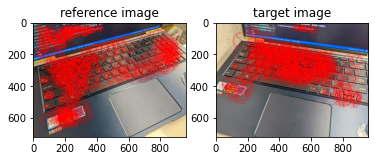

In [79]:
plt.figure()
plt.subplot(121); plt.imshow(img1_keypoints); plt.title("reference image")
plt.subplot(122); plt.imshow(img2_keypoints); plt.title("target image")

# Match keypoints in the two images

In [80]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descrpitors1, descrpitors2, None)

# sort matches
matches.sort(key=lambda x: x.distance, reverse=False)

# pick top 10% good matches
num = int(len(matches) * 0.01)
goodMatches = matches[:num]

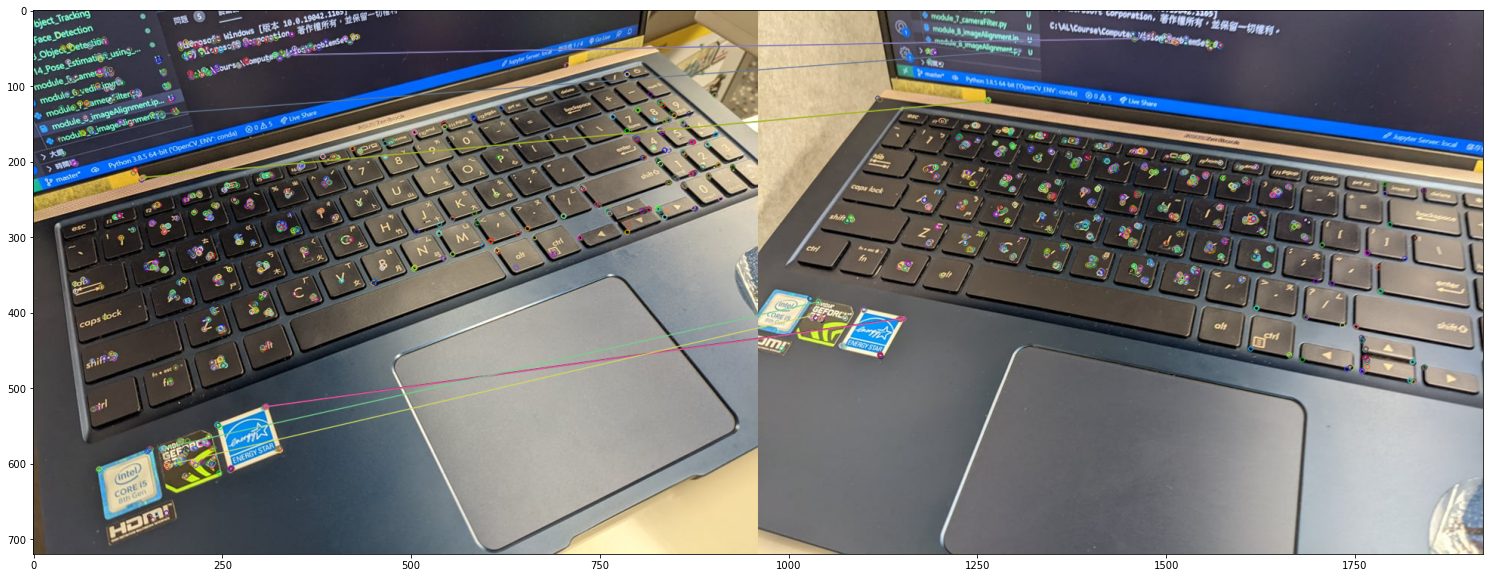

In [81]:
img_matches = cv2.drawMatches(img1, keypoint1, img2, keypoint2, goodMatches, None)

plt.figure(figsize=[40, 10])
plt.imshow(img_matches)

# Find homography

In [82]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i,:] = keypoint1[match.queryIdx].pt
    points2[i,:] = keypoint2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

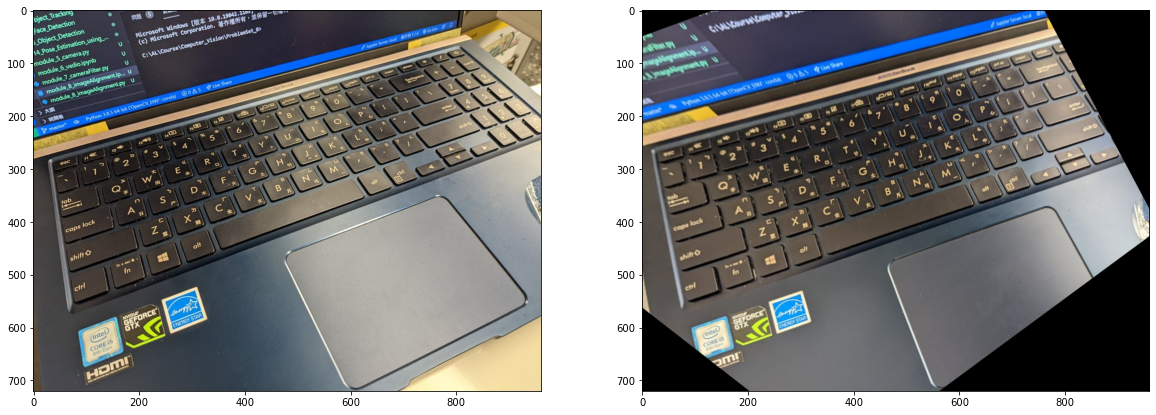

In [83]:
height, width, channels = img1.shape
img2_reg = cv2.warpPerspective(img2, h, (width, height))

plt.figure(figsize=[20,10])
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2_reg)

## 調整參數
|| MAX_FEARTURE_NUM| TOP n %|
|---|---|---|
|參數一|500|0.1|
|參數二|1000|0.1|



